
# Name: Vinay Dhake
# PRN: 202401110031
# Assignment No. 1: Feature Engineering

In [9]:



# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression
import seaborn as sns
import matplotlib.pyplot as plt

data = fetch_california_housing(as_frame=True)
df = data.frame

print("✅ Dataset loaded successfully!")
print("Shape of dataset:", df.shape)
df.head()


✅ Dataset loaded successfully!
Shape of dataset: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Missing Values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Statistical Summary:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean

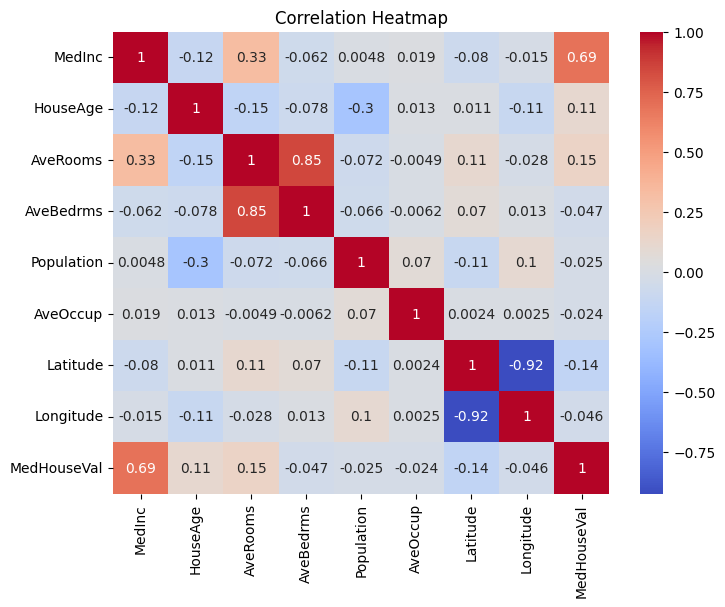

In [8]:
# 2. Explore the Dataset

print("\nDataset Info:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())

# Quick correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [10]:
# 3. Handle Missing Data

df.loc[0:10, 'MedInc'] = np.nan
print("\nMissing Values Before:\n", df.isnull().sum())

# Fill missing values with median
df['MedInc'].fillna(df['MedInc'].median(), inplace=True)
print("\nMissing Values After Handling:\n", df.isnull().sum())



Missing Values Before:
 MedInc         11
HouseAge        0
AveRooms        0
AveBedrms       0
Population      0
AveOccup        0
Latitude        0
Longitude       0
MedHouseVal     0
dtype: int64

Missing Values After Handling:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


/tmp/ipython-input-2342252477.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MedInc'].fillna(df['MedInc'].median(), inplace=True)


In [11]:

# 4. Encode Categorical Variables (Demonstration)

df['Region'] = np.where(df['Latitude'] > 35, 'North', 'South')

le = LabelEncoder()
df['Region_encoded'] = le.fit_transform(df['Region'])
df.drop('Region', axis=1, inplace=True)

print("\nAfter Encoding Categorical Feature:\n", df.head())



After Encoding Categorical Feature:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  3.5345      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  3.5345      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  3.5345      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  3.5345      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.5345      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  Region_encoded  
0    -122.23        4.526               0  
1    -122.22        3.585               0  
2    -122.24        3.521               0  
3    -122.25        3.413               0  
4    -122.25        3.422               0  


In [12]:

# 5. Feature Scaling

scaler = StandardScaler()
scaled = scaler.fit_transform(df.drop('MedHouseVal', axis=1))
scaled_df = pd.DataFrame(scaled, columns=df.columns[:-1])
scaled_df['MedHouseVal'] = df['MedHouseVal']

print("\nScaled Features (Standardized):\n")
scaled_df.head()



Scaled Features (Standardized):



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,-0.176657,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526
1,-0.176657,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585
2,-0.176657,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521
3,-0.176657,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413
4,-0.176657,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422



After PCA (Feature Extraction):



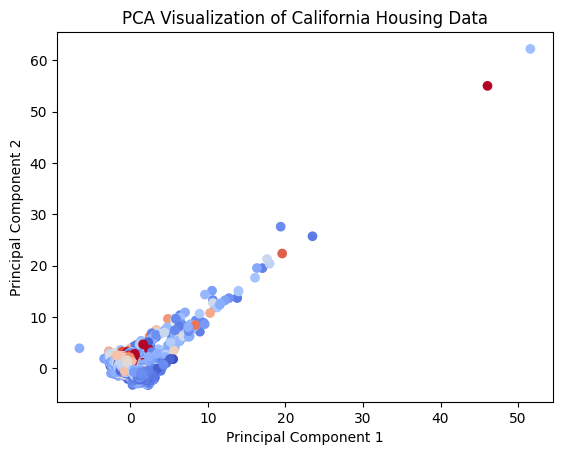

In [13]:

# 6. Feature Extraction using PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_df.drop('MedHouseVal', axis=1))

pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])
pca_df['MedHouseVal'] = scaled_df['MedHouseVal']

print("\nAfter PCA (Feature Extraction):\n")
pca_df.head()

# Visualization
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['MedHouseVal'], cmap='coolwarm')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of California Housing Data")
plt.show()


In [14]:

# 7. Feature Selection

X = scaled_df.drop('MedHouseVal', axis=1)
y = scaled_df['MedHouseVal']

# Select top 3 features with highest correlation using ANOVA F-test
selector = SelectKBest(score_func=f_regression, k=3)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("\nSelected Most Informative Features:\n", selected_features.tolist())



Selected Most Informative Features:
 ['MedInc', 'AveRooms', 'Latitude']


 What I have done in this feature engineering  Assignment??



1. Missing data handled using median imputation.
2. Added a synthetic categorical feature (Region) and label-encoded it.
3. StandardScaler used to scale all numeric features.
4. PCA applied → reduced dimensionality to 2 major components.
5. SelectKBest identified top 3 most influential features.
6. Clean and informative dataset ready for regression modeling.